In [1]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import os
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
def get_mnist(limit=None):
  print("Reading in and transforming data...")
  df = pd.read_csv('./data/mnist/train.csv')
  data = df.values
  np.random.shuffle(data)
  X = data[:, 1:].reshape(-1, 28, 28) / 255.0 # data is from 0..255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y


In [3]:
X, Y = get_mnist()

Reading in and transforming data...


In [4]:
# config
D = 28
M = 15

In [5]:
# input is an image of size 28x28
input_ = Input(shape=(D, D))


In [6]:
# up-down
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_) # output is N x D x 2M
x1 = GlobalMaxPooling1D()(x1) # output is N x 2M

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# left-right
rnn2 = Bidirectional(LSTM(M, return_sequences=True))


In [8]:
# custom layer
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

x2 = permutor(input_)
x2 = rnn2(x2) # output is N x D x 2M
x2 = GlobalMaxPooling1D()(x2) # output is N x 2M

In [9]:
# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1, x2]) # output is N x 4M

In [10]:
# final dense layer
output = Dense(10, activation='softmax')(x)

In [11]:
model = Model(inputs=input_, outputs=output)

In [12]:
# compile
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
print('Training model...')
r = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.3)


Training model...
Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 22s 761us/step - loss: 0.0642 - acc: 0.9808 - val_loss: 0.0942 - val_acc: 0.9712
Epoch 2/10
29399/29399 [==============================] - 22s 734us/step - loss: 0.0580 - acc: 0.9828 - val_loss: 0.0865 - val_acc: 0.9731
Epoch 3/10
29399/29399 [==============================] - 21s 717us/step - loss: 0.0532 - acc: 0.9841 - val_loss: 0.0805 - val_acc: 0.9754
Epoch 4/10
29399/29399 [==============================] - 20s 695us/step - loss: 0.0489 - acc: 0.9847 - val_loss: 0.0782 - val_acc: 0.9764
Epoch 5/10
29399/29399 [==============================] - 20s 683us/step - loss: 0.0467 - acc: 0.9856 - val_loss: 0.0857 - val_acc: 0.9739
Epoch 6/10
29399/29399 [==============================] - 20s 696us/step - loss: 0.0443 - acc: 0.9866 - val_loss: 0.0782 - val_acc: 0.9767
Epoch 7/10
29399/29399 [==============================] - 20s 682us/step - loss: 0.0396 - acc: 0.9

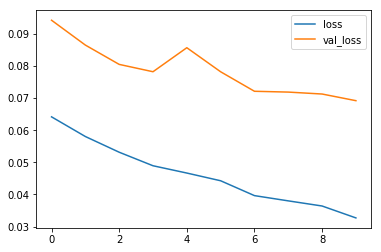

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

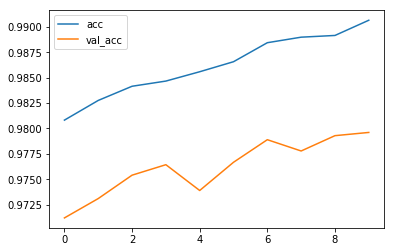

In [18]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [19]:
o = model.predict(X)
print("o.shape:", o.shape)

o.shape: (42000, 10)


In [21]:
o[0]

array([6.6013939e-08, 2.3679254e-08, 4.3341853e-07, 9.5643198e-05,
       5.5259727e-07, 9.9986434e-01, 3.5296682e-05, 5.0079931e-09,
       3.4376512e-06, 2.0662171e-07], dtype=float32)

In [26]:
X[0].shape

(28, 28)

3

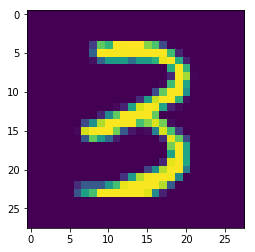

In [48]:
g = plt.imshow(X[2])
o = model.predict([[X[2]]])
o
r = np.argmax(o)
r